# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG

'''


'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n\n'

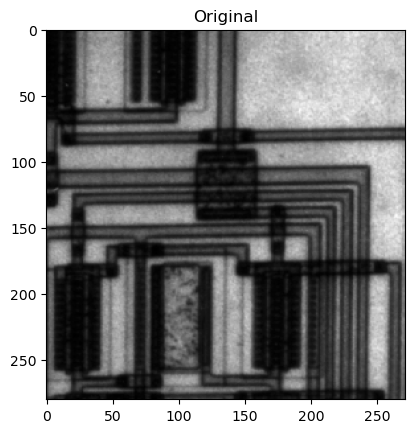

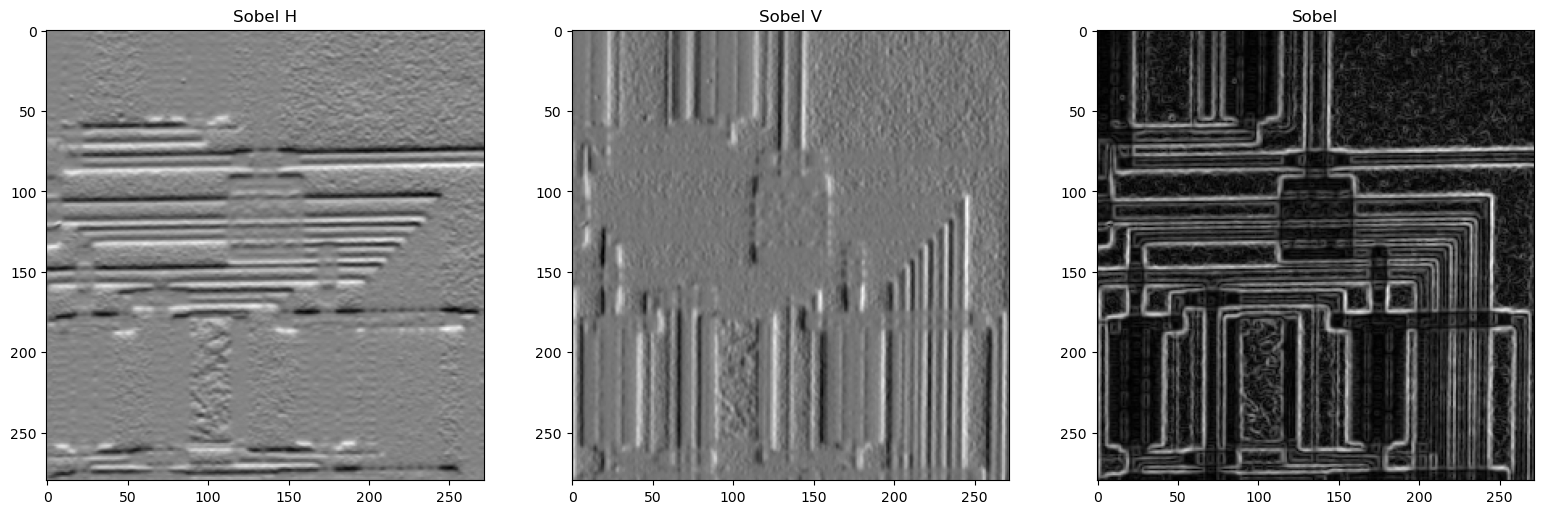

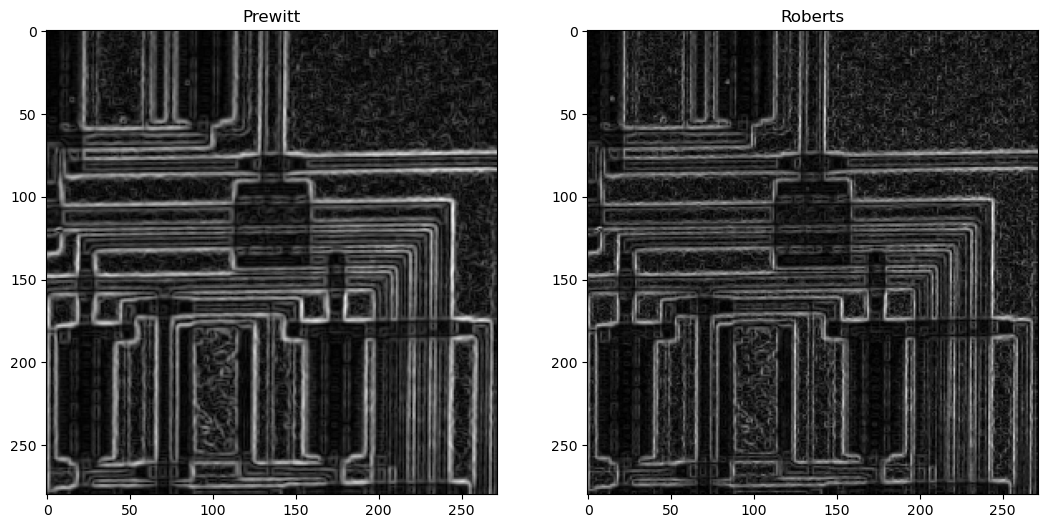

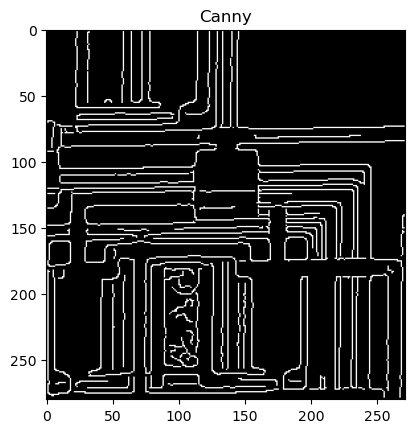

In [3]:
# 1. Built-in Sobel, Prewill, Roberts


img = io.imread('circuit.tif')
img.shape
sobel_img = sobel(img)
sobel_h_img = sobel_h(img)
sobel_v_img = sobel_v(img)
prewitt_img = prewitt(img, )
roberts_img = roberts(img)
canny_img = canny(img, sigma = 1.5)

show_images([img],['Original'])
show_images([sobel_h_img,sobel_v_img,sobel_img],[ 'Sobel H','Sobel V','Sobel'])
show_images([prewitt_img,roberts_img],[ 'Prewitt','Roberts'])
show_images([canny_img],[ 'Canny'])




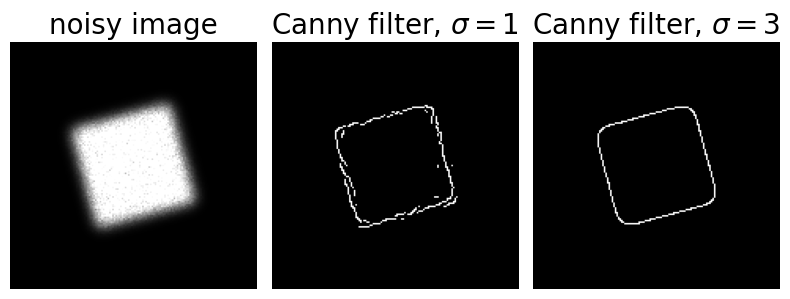

In [4]:
#  THE EXAPLE OBTAINED FROM THE FOLLOWING LINK:

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature


# Generate noisy image of a square
image = np.zeros((128, 128), dtype=float)
image[32:-32, 32:-32] = 1

image = ndi.rotate(image, 15, mode='constant')
image = ndi.gaussian_filter(image, 4)
image = random_noise(image, mode='speckle', mean=0.1)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=3$', fontsize=20)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

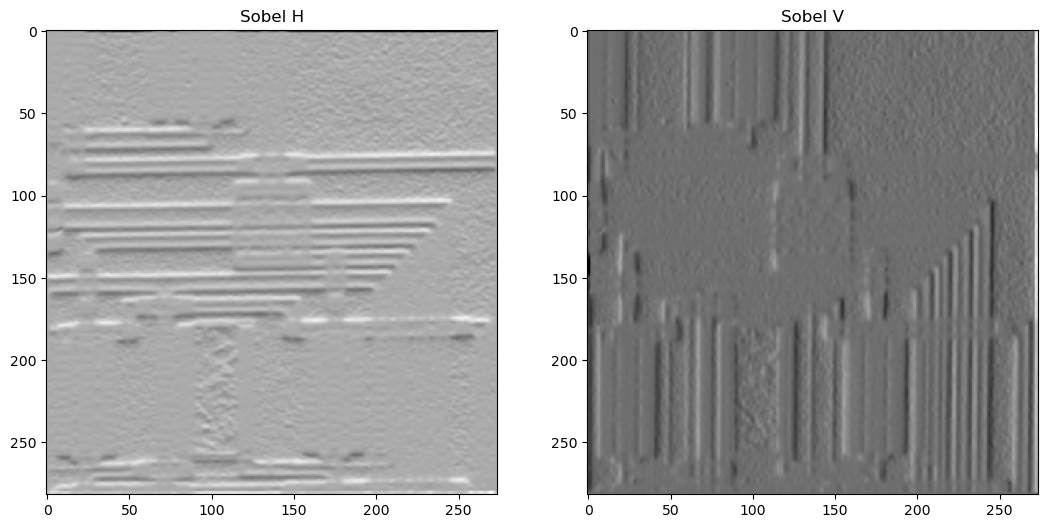

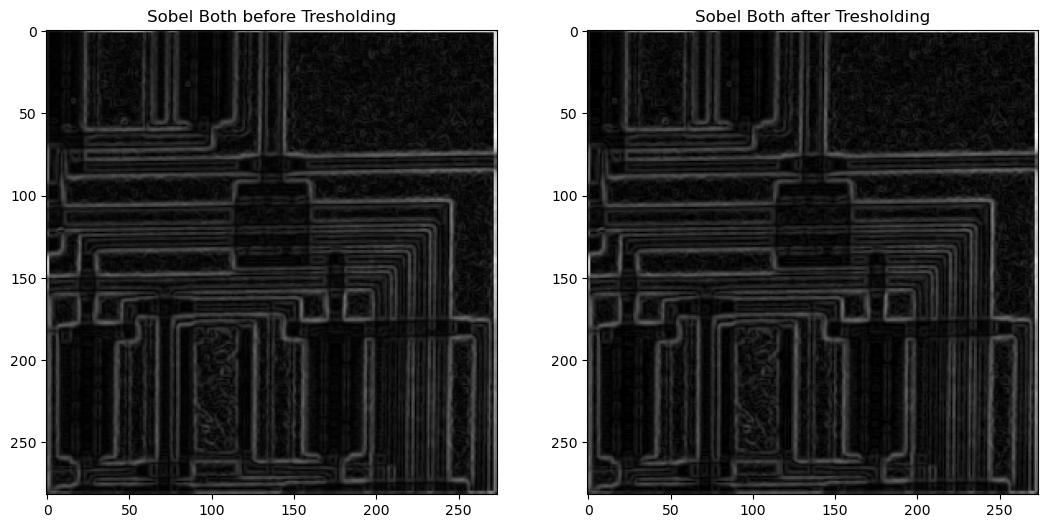

In [5]:
# 2. Custom Sobel (V-H-Both)

img = io.imread('circuit.tif')
hy = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

hx = np.array([
    [-1,-2,-1],
    [0, 0, 0],
    [1, 2, 1]
]) 

x_image = convolve2d(img, hx)
y_image = convolve2d(img, hy)
show_images([x_image,y_image],[ 'Sobel H','Sobel V'])


xy_image = np.sqrt(x_image**2 + y_image**2)


#  Tresholding
xy_image_t = xy_image.copy()
xy_image_t[xy_image_t < 10] = 0
show_images([xy_image, xy_image_t],['Sobel Both before Tresholding' ,'Sobel Both after Tresholding'])



185


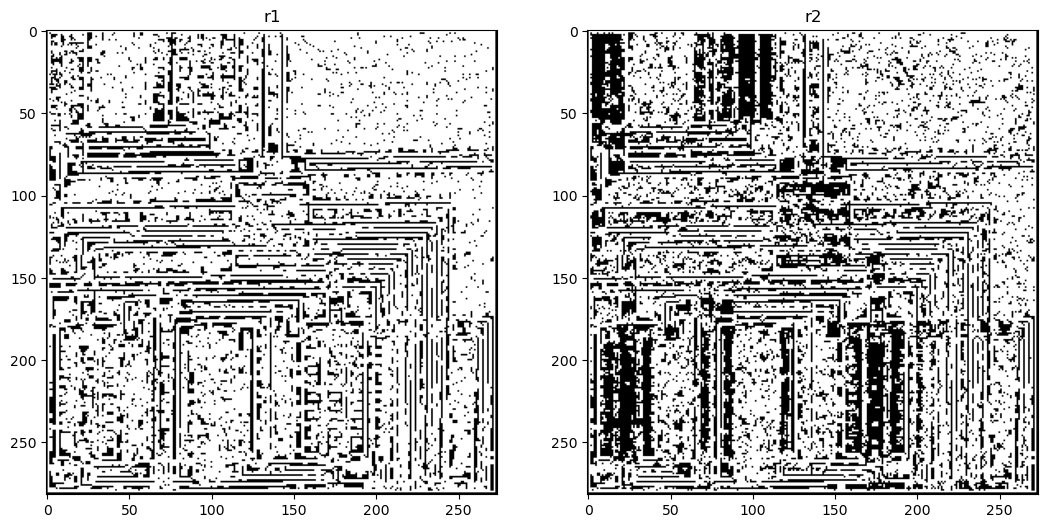

In [7]:
# 3. Custom LoG
thres= 10
sigma = .6
from skimage.util import img_as_ubyte
img = (io.imread('circuit.tif')) 
gaus_img = img_as_ubyte(gaussian(img, sigma=sigma,))

print(np.max(gaus_img))
# show_images([img, gaus_img],['Original','gaussian'])

# F1={ -1,-1,-1       f2 ={ 0,1,0,
#      -1,8,-1              1,-4,1
#      -1,-1,-1 }           0,1,0  }

f1 = np.array([ [-1,-1,-1],
                [-1,8,-1 ],
                [-1,-1,-1]])

f2 = np.array([ [0,1,0],
                [1,-4,1],
                [0,1,0]])

img_LoG_1 = convolve2d(gaus_img, f1)
img_LoG_2 = convolve2d(gaus_img, f2)

# print(img_f1)
# tresholding
# show_images([img_f1,img_f2],['f1','f2'])
def get_laplacian(img):
    # convert to a  sign array
    # lap = np.sign(img) 
    lap =img.copy() # np.sign(img) 
    # print(lap)
    # pad with zeros
    lap = np.pad(lap, ((0, 1), (0, 1)))
    diff_x = lap[:-1, :-1] - lap[:-1, 1:] > thres 
    diff_y = lap[:-1, :-1] - lap[1:, :-1] > thres
    
    edges =  np.logical_or(diff_x, diff_y).astype(float)
    # edges = np.sqrt(diff_x**2 + diff_y**2)
    return edges




def ZeroCrossCalc(LoG):
    output = np.zeros(LoG.shape)
    w = output.shape[1]
    h = output.shape[0]
    for y in range(1, h - 1):
        for x in range(1, w - 1):
            patch = LoG[y-1:y+2, x-1:x+2]-0
            p = LoG[y, x]
            maxP = patch.max()
            minP = patch.min()
            zeroCross = False
            if ((p > 0 and minP < 0)  or (p < 0 and maxP > 0)):
                zeroCross = True
             
            if ((maxP - minP) > thres) and zeroCross:
                output[y, x] = 1
    
    return output


r1 = ZeroCrossCalc(img_LoG_1)
r2 = ZeroCrossCalc(img_LoG_2)

show_images([r1,r2],['r1','r2'])



In [7]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''


'\nOptional\n1-Make edge detection\n2-Multiply by factor < 1\n3-Subtract (Orginal Image) - (Edge Detection Image)\n'